In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from dask_yarn import YarnCluster
from dask.distributed import Client

/home/hadoop/miniconda/lib/python3.8/site-packages/dask_yarn/core.py:16: FutureWarning: format_bytes is deprecated and will be removed in a future release. Please use dask.utils.format_bytes instead.
  from distributed.utils import (
/home/hadoop/miniconda/lib/python3.8/site-packages/dask_yarn/core.py:16: FutureWarning: parse_timedelta is deprecated and will be removed in a future release. Please use dask.utils.parse_timedelta instead.
  from distributed.utils import (


In [2]:
# Create a cluster where each worker has 4 vCPU core and 8 GiB of memory:
cluster = YarnCluster(environment="/home/hadoop/environment.tar.gz",
                      worker_vcores = 4,
                      worker_memory = "8GiB"
                      )

# Scale cluster out to 2 such workers:
cluster.scale(2)

# Connect to the cluster (before proceeding, you should wait for workers to be registered by the dask scheduler, as below):
client = Client(cluster)

distributed.scheduler - INFO - Clear task state
distributed.scheduler - INFO -   Scheduler at:  tcp://172.31.23.172:8786
distributed.scheduler - INFO -   dashboard at:                    :34127
22/06/04 02:36:38 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/06/04 02:36:39 INFO client.RMProxy: Connecting to ResourceManager at ip-172-31-23-172.ec2.internal/172.31.23.172:8032
22/06/04 02:36:39 INFO client.AHSProxy: Connecting to Application History server at ip-172-31-23-172.ec2.internal/172.31.23.172:10200
22/06/04 02:36:40 INFO skein.Driver: Driver started, listening on 38589
22/06/04 02:36:40 INFO conf.Configuration: resource-types.xml not found
22/06/04 02:36:40 INFO resource.ResourceUtils: Unable to find 'resource-types.xml'.
22/06/04 02:36:40 INFO skein.Driver: Uploading application resources to hdfs://ip-172-31-23-172.ec2.internal:8020/user/hadoop/.skein/application_1654309974357_0001
22/06/04 02

In [3]:
client

Connection method: Cluster object,Cluster type: YarnCluster
Dashboard: /proxy/34127/status,


In [4]:
import dask.dataframe as dd
data = dd.read_csv("s3://aws-emr-resources-605422404386-us-east-1/us.csv")

/home/hadoop/miniconda/lib/python3.8/site-packages/dask/dataframe/backends.py:187: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/hadoop/miniconda/lib/python3.8/site-packages/dask/dataframe/backends.py:187: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/hadoop/miniconda/lib/python3.8/site-packages/dask/dataframe/backends.py:187: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/hadoop/miniconda/lib/python3.8/site-packages/charset_normaliz

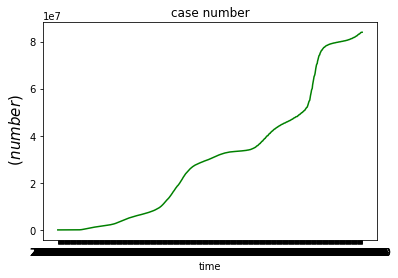

In [7]:
y2 = data["cases"].compute()
x = data["date"].compute()
plt.plot(x,y2,color = 'g',label="cases")
plt.title('case number')
plt.yscale('linear')
plt.xlabel("time")
plt.ylabel(r'$\ {(number)}$', fontsize=15)
plt.show()

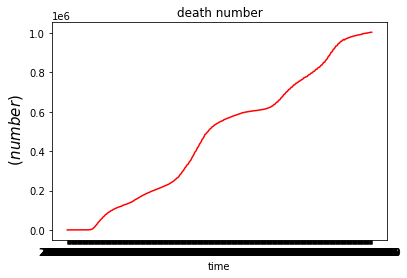

In [8]:
y1 = data["deaths"].compute()
x = data["date"].compute()
plt.plot(x,y1,color = 'r',label="deaths")
plt.title('death number')
plt.yscale('linear')
plt.xlabel("time")
plt.ylabel(r'$\ {(number)}$', fontsize=15)
plt.show()

In [3]:
data = dd.read_csv('~/desktop/amazon_pet.csv')
data.head()

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,index,product_id,title,price,num_rating,overall_rating,helpful_votes,date,star,text
0,0,0,B00006IX59,"Chuckit! Classic Ball Launcher, Medium (26 Inch)",8.72,"46,941 ratings",4.7 out of 5 stars,385 people found this helpful,"Reviewed in the United States on May 18, 2019",4.0 out of 5 stars,After I broke my other chuck it I bought the 2...
1,1,1,B00006IX59,"Chuckit! Classic Ball Launcher, Medium (26 Inch)",8.72,"46,941 ratings",4.7 out of 5 stars,909 people found this helpful,"Reviewed in the United States on July 15, 2015",3.0 out of 5 stars,Some (pointed) thoughts on the Chuck-it!® laun...
2,2,2,B00006IX59,"Chuckit! Classic Ball Launcher, Medium (26 Inch)",8.72,"46,941 ratings",4.7 out of 5 stars,100 people found this helpful,"Reviewed in the United States on June 4, 2019",5.0 out of 5 stars,I use this to throw baseball flyballs and grou...
3,3,3,B00006IX59,"Chuckit! Classic Ball Launcher, Medium (26 Inch)",8.72,"46,941 ratings",4.7 out of 5 stars,145 people found this helpful,"Reviewed in the United States on May 19, 2017",VINE VOICE,"Combined with the Max Glow ball, this is the b..."
4,4,4,B00006IX59,"Chuckit! Classic Ball Launcher, Medium (26 Inch)",8.72,"46,941 ratings",4.7 out of 5 stars,50 people found this helpful,"Reviewed in the United States on April 7, 2019",TOP 1000 REVIEWER,I have a young Golden Retriever who would retr...


In [4]:
# preprocessing 
data['num_rating'] = data['num_rating'].astype(str).map(lambda x:x.replace("ratings",'').replace(",",''))
data['helpful_votes'] = data['helpful_votes'].astype(str).map(lambda x:x.replace(' people found this helpful','').replace(",",'') if 'people' in x else 0)
data['star'] = data['star'].astype(str).map(lambda x:x.replace(" out of 5 stars",'').replace(",",'') if 'out of' in x else 0)
data['overall_rating'] = data['overall_rating'].astype(str).map(lambda x:x.replace(" out of 5 stars",'').replace(",",'') if 'out of' in x else 0)
data['date'] = data['date'].astype(str).map(lambda x:x.split(',')[-1])
# to float
data['star'] = data['star'].astype(float)
data['price'] = data['price'].astype(str).map(lambda x:float(x) if 'none' not in x else 0)
data['helpful_votes'] = data['helpful_votes'].astype(float)
data['overall_rating'] = data['overall_rating'].astype(float)

In [5]:
data.head()

,Unnamed: 0,index,product_id,title,price,num_rating,overall_rating,helpful_votes,date,star,text
0,0,0,B00006IX59,"Chuckit! Classic Ball Launcher, Medium (26 Inch)",8.72,46941,4.7,385.0,2019,4.0,After I broke my other chuck it I bought the 2...
1,1,1,B00006IX59,"Chuckit! Classic Ball Launcher, Medium (26 Inch)",8.72,46941,4.7,909.0,2015,3.0,Some (pointed) thoughts on the Chuck-it!® laun...
2,2,2,B00006IX59,"Chuckit! Classic Ball Launcher, Medium (26 Inch)",8.72,46941,4.7,100.0,2019,5.0,I use this to throw baseball flyballs and grou...
3,3,3,B00006IX59,"Chuckit! Classic Ball Launcher, Medium (26 Inch)",8.72,46941,4.7,145.0,2017,0.0,"Combined with the Max Glow ball, this is the b..."
4,4,4,B00006IX59,"Chuckit! Classic Ball Launcher, Medium (26 Inch)",8.72,46941,4.7,50.0,2019,0.0,I have a young Golden Retriever who would retr...


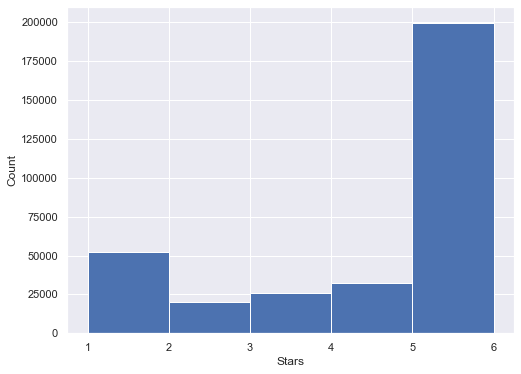

In [42]:
# stars count
plt.figure(figsize=(8,6))
plt.hist(data['star'].compute(),bins = [1,2,3,4,5,6])
plt.xlabel('Stars')
plt.ylabel("Count")
plt.show()

In [37]:
data = data[data.star != 0]

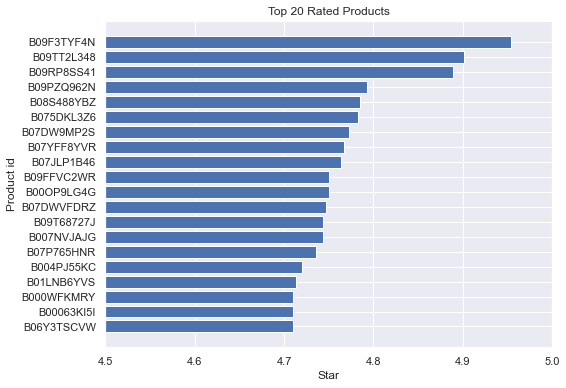

In [7]:
# top products
top_product = data.groupby('product_id').mean().reset_index().compute().sort_values(by=['star'],ascending=False).head(20).sort_values(by=['star'],ascending=True)
plt.figure(figsize=(8,6))
plt.title('Top 20 Rated Products')
plt.barh(top_product['product_id'],top_product['star'])
plt.xlabel('Star')
plt.ylabel("Product id")
plt.xlim(4.5,5)
plt.show()

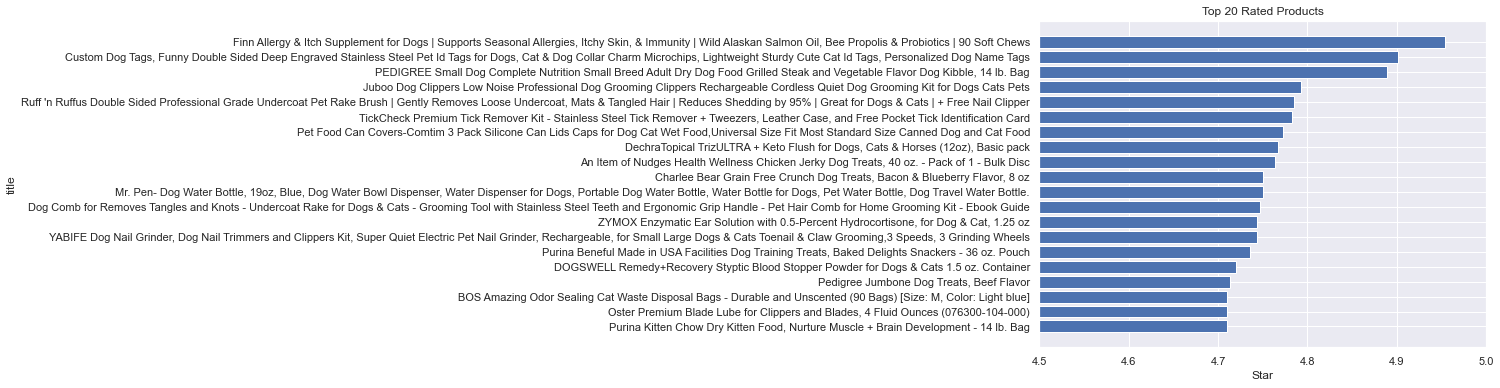

In [8]:
# top products
top_product = data.groupby('title').mean().reset_index().compute().sort_values(by=['star'],ascending=False).head(20).sort_values(by=['star'],ascending=True)
plt.figure(figsize=(8,6))
plt.title('Top 20 Rated Products')
plt.barh(top_product['title'],top_product['star'])
plt.xlabel('Star')
plt.ylabel("title")
plt.xlim(4.5,5)
plt.show()

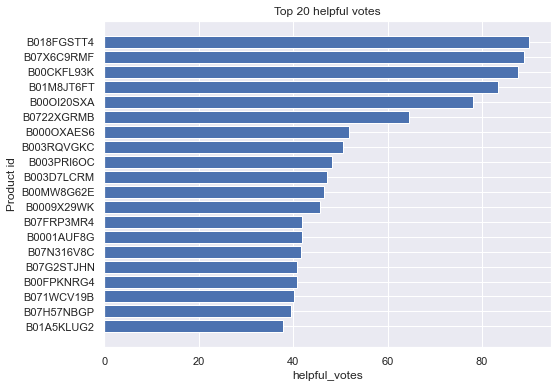

In [9]:
# top helpful votes
top_product = data.groupby('product_id').mean().reset_index()..compute()sort_values(by=['helpful_votes'],ascending=False).head(20).sort_values(by=['helpful_votes'],ascending=True)
plt.figure(figsize=(8,6))
plt.title('Top 20 helpful votes')
plt.barh(top_product['product_id'],top_product['helpful_votes'])
plt.xlabel('helpful_votes')
plt.ylabel("Product id")
plt.show()

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0, flags=flags)


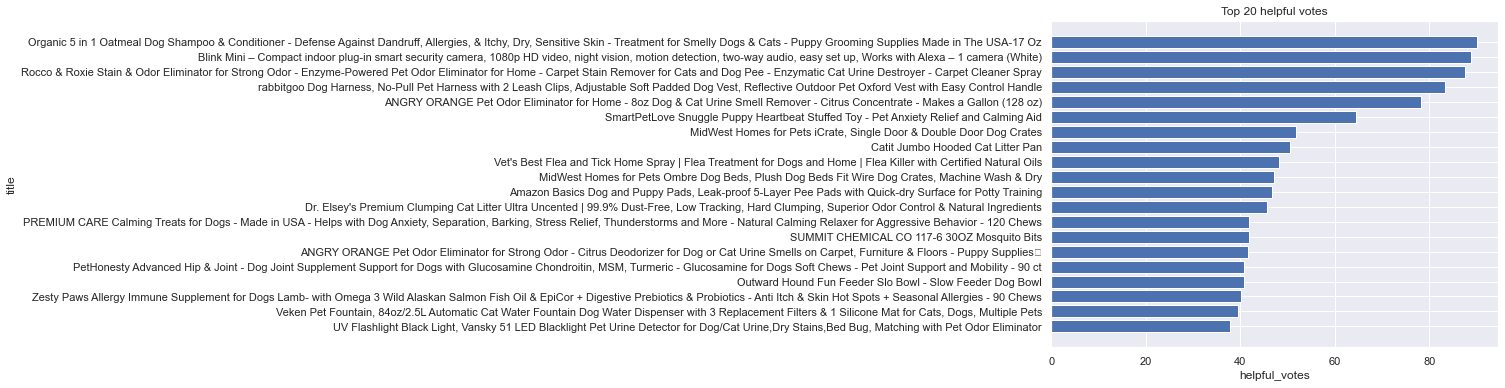

In [10]:
# top helpful votes
top_product = data.groupby('title').mean().reset_index().compute().sort_values(by=['helpful_votes'],ascending=False).head(20).sort_values(by=['helpful_votes'],ascending=True)
plt.figure(figsize=(8,6))
plt.title('Top 20 helpful votes')
plt.barh(top_product['title'],top_product['helpful_votes'])
plt.xlabel('helpful_votes')
plt.ylabel("title")
plt.show()

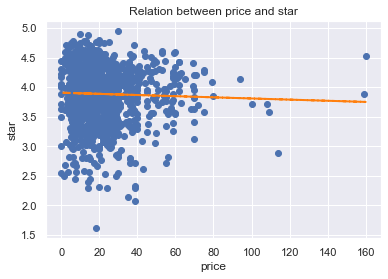

In [11]:

rel = data.groupby('product_id').mean().compute()
plt.scatter(rel['price'],rel['star'])
x1 = data['price'].compute()
y1 = data['star'].compute()

m1,b1 = np.polyfit(x1, y1, 1)
plt.plot(x1, m1*x1 + b1,'--', label='label', linewidth=2, c = 'tab:orange')
plt.title('Relation between price and star')

plt.xlabel('price')
plt.ylabel("star")
plt.show()

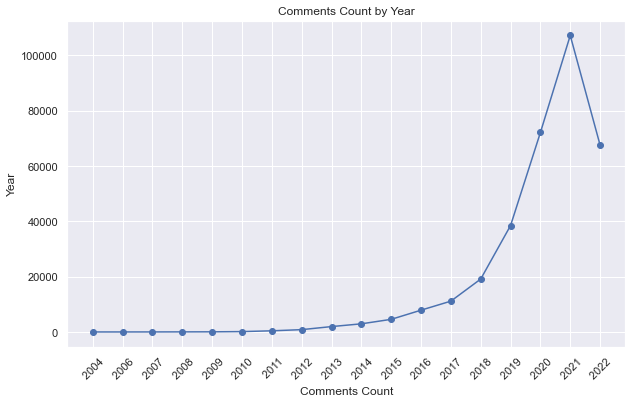

In [12]:
# comment group by date
year = data.groupby('date').count().compute()
plt.figure(figsize=(10,6))
plt.title('Comments Count by Year')
plt.plot(year['star'],'-o')
plt.xlabel('Comments Count')
plt.ylabel("Year")
plt.xticks(rotation=45)
plt.show()


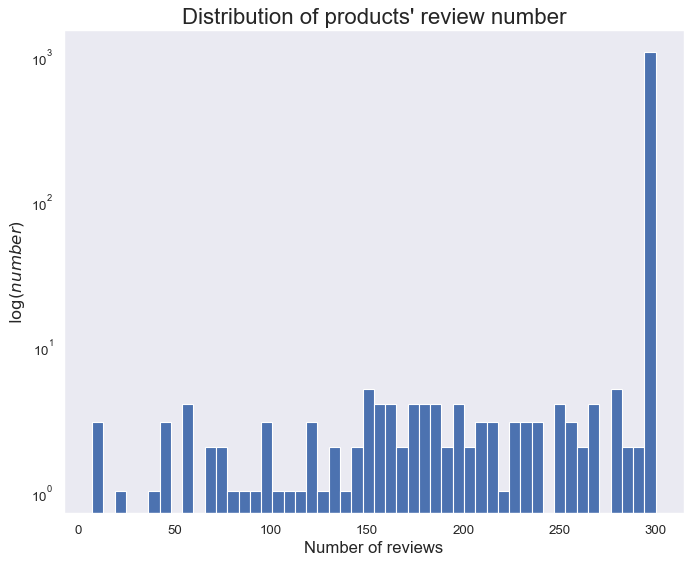

In [16]:
product_check = data.groupby('product_id').count().compute()["index"]
fig = plt.figure(figsize=(10, 8), dpi=80)
plt.hist(product_check.values,bins=50)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.ylabel(r'$\log {(number)}$', fontsize=15)
plt.xlabel('Number of reviews', fontsize=15)
plt.title("Distribution of products' review number", fontsize=20)
plt.show()

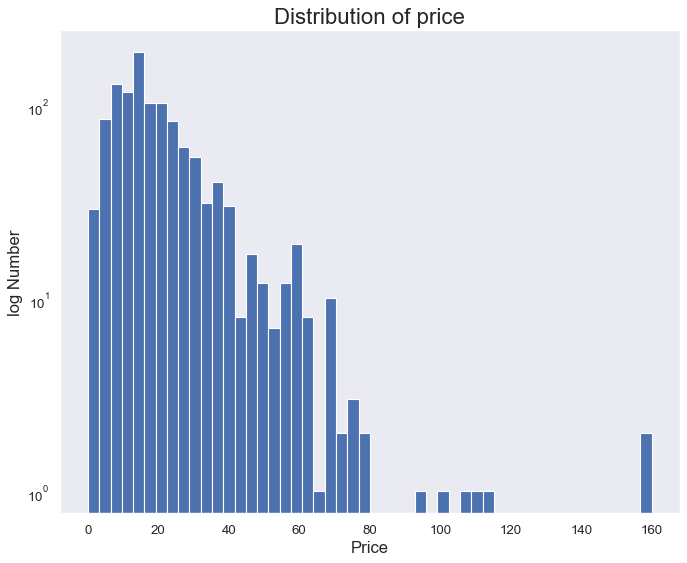

In [35]:
product_check = data.groupby('product_id').mean().compute()["price"]
fig = plt.figure(figsize=(10, 8), dpi=80)
plt.hist(product_check.values,bins=50)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.ylabel('log Number', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.title("Distribution of price", fontsize=20)
plt.show()

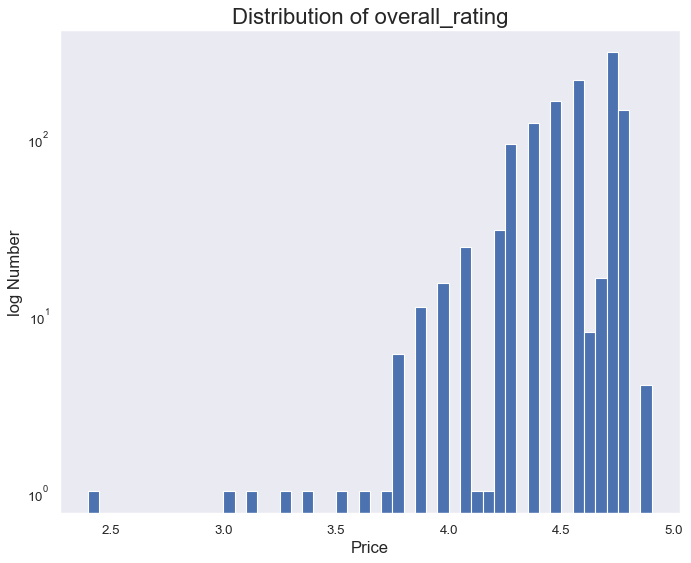

In [43]:
product_check = data.groupby('product_id').mean().compute()["overall_rating"]
fig = plt.figure(figsize=(10, 8), dpi=80)
plt.hist(product_check.values,bins=50)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.ylabel('log Number', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.title("Distribution of overall_rating", fontsize=20)
plt.show()